# 데이터셋 출처
   + https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성

   + Pregnancies : 임신 횟수
   + Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
   + BloodPressure : 이완기 혈압 (mm Hg)
   + SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
   + Insulin : 2시간 혈청 인슐린 (mu U / ml)
   + BMI : 체질량 지수 (체중kg / 키(m)^2)
   + DiabetesPedigreeFunction : 당뇨병 혈통 기능
   + Age : 나이
   + Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


# 필요한 라이브러리 로드

In [42]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [43]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

# 학습,예측 데이터 만들기

In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [45]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan', 'low_glu_Insulin']]
X.shape

(768, 9)

In [46]:
y = df["Outcome"]
y.shape

(768,)

In [47]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [48]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [49]:
# test 세트의 문제와 정답을 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 머신러닝 알고리즘 사용하기

In [90]:
# DecisionTree 를 불러옵니다.

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

## 최적의 max_depth 값 찾기

In [54]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## bagging

In [97]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model

RandomForestClassifier(random_state=42)

## Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model?

# Grid Search

   + https://sklearn.org/modules/cross_validation.html#cross-validation
   + https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [55]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth" : range(3,12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 214 out of 225 | elapsed:    5.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [56]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [57]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [58]:
clf.best_score_

0.8664934026389444

In [59]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.004188,3.987802e-04,0.002194,3.989707e-04,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.004787,1.162034e-03,0.003391,3.313480e-03,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.003989,4.909339e-07,0.002792,1.595260e-03,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.004188,3.996153e-04,0.001596,4.883637e-04,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.003989,7.072638e-07,0.001597,4.880916e-04,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5
17,0.004188,3.993051e-04,0.001596,4.891039e-04,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5
31,0.004787,1.162630e-03,0.001995,9.818678e-07,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.902439,0.780488,0.861789,0.885246,0.856724,0.041834,7
11,0.004587,7.979516e-04,0.001995,7.008046e-07,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.837398,0.878049,0.821138,0.878049,0.868852,0.856697,0.023222,8
1,0.003990,6.315810e-04,0.002593,7.975819e-04,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
6,0.003989,8.449576e-07,0.001795,3.980645e-04,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9


In [60]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [61]:
clf.score(X_test, y_test)

0.8701298701298701

In [62]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([14, 16,  8,  9, 10,  4, 11, 17,  9, 10])

In [63]:
model

DecisionTreeClassifier(random_state=42)

In [64]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.71160996, 0.89601733, 0.86866424, 0.84257106, 0.84254086,
       0.98097479, 0.99275122, 0.89541721, 0.86019996, 0.86407443,
       0.89960054, 0.88229902, 0.85909146, 0.86953686, 0.70861725,
       0.75213002, 0.90439855, 0.93871628, 0.89738595, 0.959304  ,
       0.84532007, 0.97310786, 0.73445835, 0.96349992, 0.73880065,
       0.9867072 , 0.87646679, 0.73400855, 0.9450644 , 0.79961339,
       0.94533727, 0.86856684, 0.81895317, 0.79372669, 0.77656122,
       0.79708827, 0.8807907 , 0.83115865, 0.95741853, 0.8341886 ,
       0.84411589, 0.95902887, 0.85949081, 0.80906327, 0.80949344,
       0.99327983, 0.84787368, 0.98057039, 0.74005569, 0.77735796,
       0.97646864, 0.88691474, 0.98684176, 0.72844187, 0.99094883,
       0.89352776, 0.92624184, 0.83419237, 0.83734648, 0.86030223,
       0.72699069, 0.93550029, 0.74287963, 0.92213909, 0.88370781,
       0.95157689, 0.95083516, 0.87656048, 0.9472181 , 0.7072475 ,
       0.74424953, 0.7104897 , 0.97336115, 0.92921222, 0.81102

In [65]:
param_distributions = {"max_depth" : max_depth, 
                       "max_features" : max_features, 
                       "min_samples_split" : list(range(2, 7))}
param_distributions

{'max_depth': array([14, 16,  8,  9, 10,  4, 11, 17,  9, 10]),
 'max_features': array([0.71160996, 0.89601733, 0.86866424, 0.84257106, 0.84254086,
        0.98097479, 0.99275122, 0.89541721, 0.86019996, 0.86407443,
        0.89960054, 0.88229902, 0.85909146, 0.86953686, 0.70861725,
        0.75213002, 0.90439855, 0.93871628, 0.89738595, 0.959304  ,
        0.84532007, 0.97310786, 0.73445835, 0.96349992, 0.73880065,
        0.9867072 , 0.87646679, 0.73400855, 0.9450644 , 0.79961339,
        0.94533727, 0.86856684, 0.81895317, 0.79372669, 0.77656122,
        0.79708827, 0.8807907 , 0.83115865, 0.95741853, 0.8341886 ,
        0.84411589, 0.95902887, 0.85949081, 0.80906327, 0.80949344,
        0.99327983, 0.84787368, 0.98057039, 0.74005569, 0.77735796,
        0.97646864, 0.88691474, 0.98684176, 0.72844187, 0.99094883,
        0.89352776, 0.92624184, 0.83419237, 0.83734648, 0.86030223,
        0.72699069, 0.93550029, 0.74287963, 0.92213909, 0.88370781,
        0.95157689, 0.95083516, 0.876

In [66]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV( model,
                    param_distributions,
                    n_iter=1000,
                    scoring="accuracy",
                    n_jobs=-1,
                    cv=5,
                    random_state=42
                  )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([14, 16,  8,  9, 10,  4, 11, 17,  9, 10]),
                                        'max_features': array([0.71160996, 0.89601733, 0.86866424, 0.84257106, 0.84254086,
       0.98097479, 0.99275122, 0.89541721, 0.86019996, 0.86407443,
       0.89960054, 0.88229902, 0.85909146, 0.86953686, 0.70861725...
       0.74424953, 0.7104897 , 0.97336115, 0.92921222, 0.81102575,
       0.75217375, 0.99295692, 0.84311736, 0.86313366, 0.88295537,
       0.88770546, 0.89177518, 0.85061485, 0.80567178, 0.90009909,
       0.72422615, 0.93705753, 0.87054074, 0.76508586, 0.85323942,
       0.72643396, 0.83324216, 0.77778571, 0.83892139, 0.98836416,
       0.78410909, 0.79485525, 0.89322123, 0.79600281, 0.77455379]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, s

In [67]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.860302228511191, 'max_depth': 10}

In [68]:
clf.best_score_

0.8713847794215648

In [69]:
clf.score(X_test, y_test)

0.8571428571428571

In [70]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
112,0.005186,0.001595,0.006583,0.008191,6,0.959029,9,"{'min_samples_split': 6, 'max_features': 0.959...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
88,0.010971,0.012505,0.003390,0.001492,4,0.860302,10,"{'min_samples_split': 4, 'max_features': 0.860...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
946,0.010372,0.010900,0.001596,0.000488,6,0.957419,9,"{'min_samples_split': 6, 'max_features': 0.957...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
701,0.006582,0.003064,0.004786,0.004653,6,0.899601,9,"{'min_samples_split': 6, 'max_features': 0.899...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1
944,0.008576,0.005520,0.002194,0.000747,6,0.986707,9,"{'min_samples_split': 6, 'max_features': 0.986...",0.869919,0.878049,0.829268,0.878049,0.901639,0.871385,0.023580,1


# 학습과 예측하기

In [116]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

GradientBoostingClassifier()

# 정확도(Accuracy)측정하기

In [117]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [120]:
feature_names = X_train.columns.tolist()

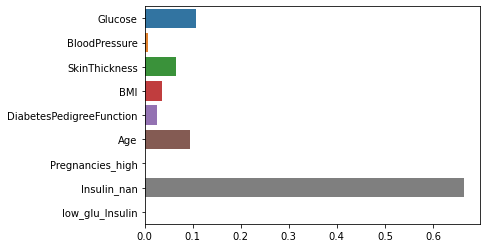

In [122]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [118]:
# 다르게 예측한 개수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28
# RF : 20
# GB : 24

(y_predict != y_test).sum()

24

In [123]:
# accuracy score 를 구합니다.
# DT : 0.818
# RF : 0.870
# GB : 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

84.4155844155844